# Task 1 , Preprocessing and checking data frames

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv(r"C:\Users\sgovind\OneDrive - Intel Corporation\Desktop\Personal\bits pilani\unsupervised learning\assignemnt two\jewellery.csv")

In [4]:
df.shape

(505, 4)

In [5]:
df.head()

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


In [6]:
# Dtypes
df.dtypes


Age                int64
Income             int64
SpendingScore    float64
Savings          float64
dtype: object

In [8]:
# Descriptive Stat
df.describe()

,Age,Income,SpendingScore,Savings
count,505.000000,505.000000,505.000000,505.000000
mean,59.019802,75513.291089,0.505083,11862.455867
std,24.140043,35992.922184,0.259634,4949.229253
min,17.000000,12000.000000,0.000000,0.000000
25%,34.000000,34529.000000,0.304792,6828.709702
50%,59.000000,75078.000000,0.368215,14209.932802
75%,85.000000,107100.000000,0.768279,16047.268331
max,97.000000,142000.000000,1.000000,20000.000000


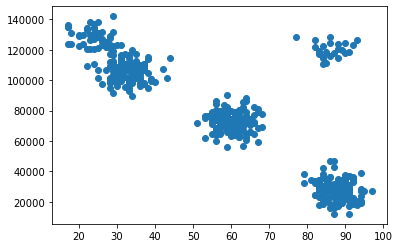

In [9]:
# Simple Plot
plt.scatter(df['Age'],df['Income'])

In [10]:
# Groups based on Age and Income
df.groupby(['Age','Income']).size()

Age  Income
17   123828    1
     134734    1
     134966    1
     136255    1
18   123718    1
              ..
94   27771     1
     28352     1
     38923     1
95   27038     1
97   27271     1
Length: 505, dtype: int64

# Task 2 Cluster data using DBSCAN and checking for outliers

In [11]:
# Scale our data
from sklearn.preprocessing import StandardScaler

In [12]:
X = StandardScaler().fit_transform(df)
X

array([[-4.22871323e-02,  6.27330450e-02,  1.10359261e+00,
        -1.07246676e+00],
       [-8.21109365e-04,  1.74810526e-01,  1.10264136e+00,
        -1.30347264e+00],
       [ 1.23576959e-01, -2.11999168e-02,  7.61727378e-01,
        -5.26555609e-01],
       ...,
       [ 1.28462560e+00, -1.11844679e+00, -5.78054216e-01,
         8.55312853e-01],
       [ 1.32609162e+00, -1.52492929e+00, -5.79865675e-01,
         1.32245159e+00],
       [ 1.24315958e+00, -1.25833506e+00, -8.31889623e-01,
         5.10463045e-01]])

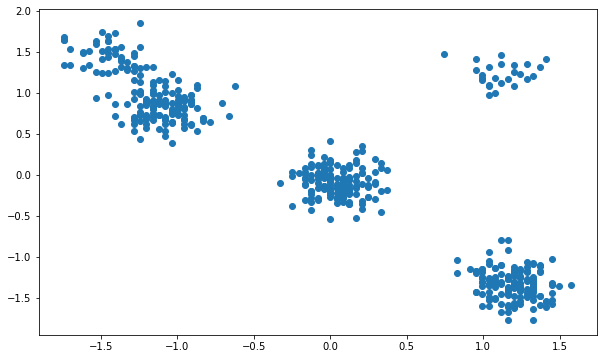

In [16]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], cmap='Paired')

In [29]:
# Init Model
from sklearn.cluster import DBSCAN

In [30]:
dbscan = DBSCAN(eps=0.3,min_samples=10)

In [31]:
# Fit Model
y_cluster_dbs = dbscan.fit_predict(X)

In [32]:
y_cluster_dbs

array([ 0,  0,  0,  0,  1,  4,  0,  1,  1,  1, -1,  2,  2,  2,  0,  3,  0,
        1,  1,  3,  2,  3,  0,  1, -1,  4, -1,  0,  1,  0,  0,  0,  1,  0,
        2,  0,  1,  0,  2,  2,  0,  1,  4,  0,  0,  4,  3,  4,  2,  0,  1,
        2,  4,  1,  0,  1,  2,  1,  1,  1,  1,  1,  1,  0,  0,  0,  1, -1,
        4,  0,  0,  2,  1,  1,  2,  0,  2,  0,  0,  4,  0, -1,  0,  1,  1,
        2,  2,  0,  0,  0,  0,  0,  4,  1,  0,  4,  2,  0,  0,  2,  2,  4,
        2,  4,  2,  1, -1,  2,  2,  0,  1,  2,  0,  2,  2,  2,  0,  2, -1,
        1,  2,  1,  1,  1,  2,  3,  0,  1,  0,  0,  2,  0,  2,  0,  4,  1,
       -1,  4,  0,  2,  1,  0,  0,  4,  0,  4,  0, -1,  0,  1,  0,  2,  1,
        0,  1,  3,  2,  0,  1,  0,  2,  1,  0,  2, -1,  2,  1,  0,  2,  0,
        1,  0,  2,  0,  1,  0,  0,  1,  1,  1,  0,  0,  2,  4,  4,  1,  2,
        0,  0,  0,  2,  1,  0,  0,  0,  1, -1,  2,  1,  1,  1,  2,  0,  2,
        0,  2,  0,  1,  4,  0,  1,  1, -1,  1,  0,  1,  2,  4,  2,  1,  0,
        0,  2,  1,  2,  4

In [33]:
#  Number of Unique Clusters
set(y_cluster_dbs)

{-1, 0, 1, 2, 3, 4}

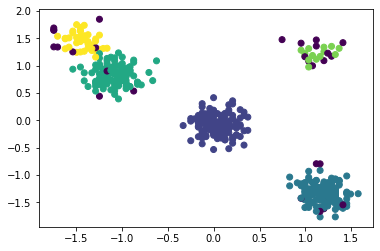

In [34]:
# Non Spherical Data
plt.scatter(X[:,0],X[:,1],c=y_cluster_dbs)

In [41]:
# Number of cluster
labels = dbscan.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

In [42]:
n_clusters_

5

In [43]:
# Identify Noise
n_noise = list(dbscan.labels_).count(-1)

In [44]:
n_noise

30

# Task 3 Removing Outliers and again plotting graph for clusters.

In [46]:
outliers_df= pd.DataFrame(df) 
outliers = outliers_df[labels==-1]

In [53]:
outliers.shape

(30, 4)

In [63]:
outliers.describe()

,Age,Income,SpendingScore,Savings
count,30.000000,30.000000,30.000000,30.000000
mean,61.533333,99386.300000,0.418639,11698.824666
std,31.420105,41884.423159,0.358638,5708.502457
min,17.000000,15671.000000,0.000000,0.000000
25%,28.250000,92225.000000,0.099719,5386.157319
50%,82.500000,118682.500000,0.329643,14222.024079
75%,87.000000,125785.750000,0.845079,15960.953803
max,93.000000,142000.000000,1.000000,17969.693769


In [64]:
outliers.head()

,Age,Income,SpendingScore,Savings
10,85,111389,0.036795,16009.237763
24,89,119697,0.091679,16215.399077
26,17,134966,0.907242,4128.044796
67,28,123153,0.984241,3697.513645
81,84,114406,0.123838,16840.570584


In [56]:
df.drop(outliers.index, axis=0,inplace=True) #Remove outliers data from main data frame 

In [57]:
df.shape

(475, 4)

In [58]:
X = StandardScaler().fit_transform(df)
X

array([[-0.03646359,  0.10734363,  1.11716657, -1.08452553],
       [ 0.0058841 ,  0.22228913,  1.1161849 , -1.31767442],
       [ 0.13292717,  0.02126286,  0.76436751, -0.53355   ],
       ...,
       [ 1.31866253, -1.1040621 , -0.61826414,  0.86113793],
       [ 1.36101022, -1.52094631, -0.62013354,  1.33261027],
       [ 1.27631484, -1.24753005, -0.88021793,  0.51308898]])

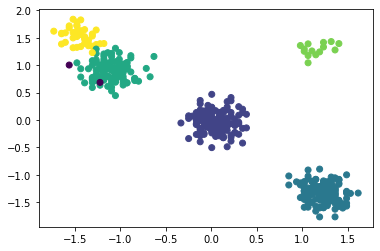

In [59]:
dbscan = DBSCAN(eps=0.3,min_samples=10)
# Fit Model
y_cluster_dbs = dbscan.fit_predict(X)
# Non Spherical Data
plt.scatter(X[:,0],X[:,1],c=y_cluster_dbs)

In [60]:
# Number of cluster
labels = dbscan.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

In [61]:
n_clusters_

5

In [62]:
# Identify Noise
n_noise = list(dbscan.labels_).count(-1)
n_noise

2

In [74]:
file_name = 'MarksDataFinal.xlsx'
df.to_excel(file_name)

# Interpretation from output :

Below data point differnetiate the classes from each other:

Classes are based on age and spending score of the person and are grouped as below when we anaylse final data frame with labels.

1 Age 51 to 68 fall in label 0
2 Age group of 79 to 97 with higher spending score more than 0.2 fall in label 1
3 Age group 24 to 44 with spending score of 0.18 to 0.4 fall  in label 2
4 Age group 82 to 92 with very low spending score less than 0.1 fall in label 3
5 Age group 18 to 31 with spending score above 0.8 fall in label 4

After removal of outlier noise reduced from 30 to 2. WHich mean cluster are grouped well.
